<a href="https://colab.research.google.com/github/dhsprojects/advancepython/blob/master/large_problem_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#import the libary

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
#loading the dataset

df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
#checking the datatypes
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [26]:
#using one-hot encoder to convert the numeric data
df = pd.get_dummies(df)
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [27]:
#seperate x and y
x = df.drop(["charges"],axis=1)
y = df["charges"]
x.shape,y.shape

((1338, 11), (1338,))

In [28]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [29]:
len(x),len(x_train),len(x_test)

(1338, 1070, 268)

In [30]:
0.2*1338


267.6

In [42]:
#model1

# set random 
tf.random.set_seed(42)

#create input and dense layer
model1 = tf.keras.Sequential(
    tf.keras.layers.Dense(1),
)

#compile the model
model1.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

#fitting the model
model1.fit(x_train,y_train,epochs=5)

Epoch 1/5
34/34 [==============================] - 0s 867us/step - loss: 12936.5752 - mae: 12936.5752
Epoch 2/5
34/34 [==============================] - 0s 782us/step - loss: 12091.7373 - mae: 12091.7373
Epoch 3/5
34/34 [==============================] - 0s 785us/step - loss: 11264.6709 - mae: 11264.6709
Epoch 4/5
34/34 [==============================] - 0s 776us/step - loss: 10507.7217 - mae: 10507.7217
Epoch 5/5
34/34 [==============================] - 0s 794us/step - loss: 9859.0068 - mae: 9859.0068


In [32]:
#eluation the model
model1.evaluate(x_train,y_train)

34/34 [==============================] - 0s 739us/step - loss: 9560.3418 - mae: 9560.3418


[9560.341796875, 9560.341796875]

In [33]:
#test the model
def mae(y_true,y_pred):
  mae = tf.losses.mean_absolute_error(y_true,y_pred)
  return mae

def mse(y_true,y_pred):
  mse = tf.losses.mean_squared_error(y_true,y_pred)
  return mse

In [34]:
#predict the model
y_pred = model1.predict(x_test)
y_pred = y_pred.reshape(268,)
y_pred.shape

(268,)

In [35]:
#evaluate model1
mae(y_true = y_test, y_pred=y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=9241.274>

In [36]:
mse(y_true = y_test, y_pred=y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=227512000.0>

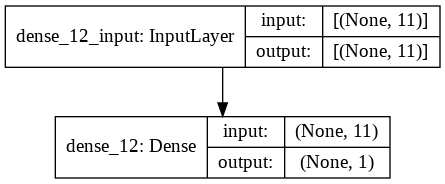

In [37]:
#model1 summary
from tensorflow.keras.utils import plot_model
plot_model(model = model1,show_shapes=True)
#model1.summary()

In [38]:
x_train.dtypes

age                   int64
bmi                 float64
children              int64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [39]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train)
#x_train = scaler.transform(x_train)

In [47]:
#model2
tf.random.set_seed(42)

#input and dense layer for model2
model2 = tf.keras.Sequential(
    tf.keras.Input(shape=(12,1)),
    tf.keras.layers.Dense(10,activation="relu"), 
    tf.keras.layers.Dense(1)
)

#compile the model
model2.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['mae'])

#fitting the model
model2.fit(x = x_train,y = y_train, epochs = 100, verbose=0)

TypeError: ignored

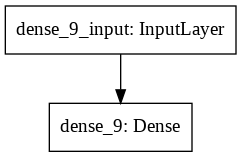

In [ ]:
plot_model(model = model2)